<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/Chips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [2]:
chip_data = pd.read_csv('/content/chip_dataset.csv')

In [3]:
chip_data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


##**Exploring the missingness in the dataset**

In [4]:
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [5]:
chip_data.isnull().sum() / chip_data.shape[0] * 100

,0
Product,0.000000
Type,0.000000
Release Date,4.024267
Process Size (nm),0.000000
TDP (W),8.837209
Die Size (mm^2),7.118301
Transistors (million),11.223458
Freq (GHz),8.837209
Foundry,12.436805
Vendor,0.000000


<Axes: >

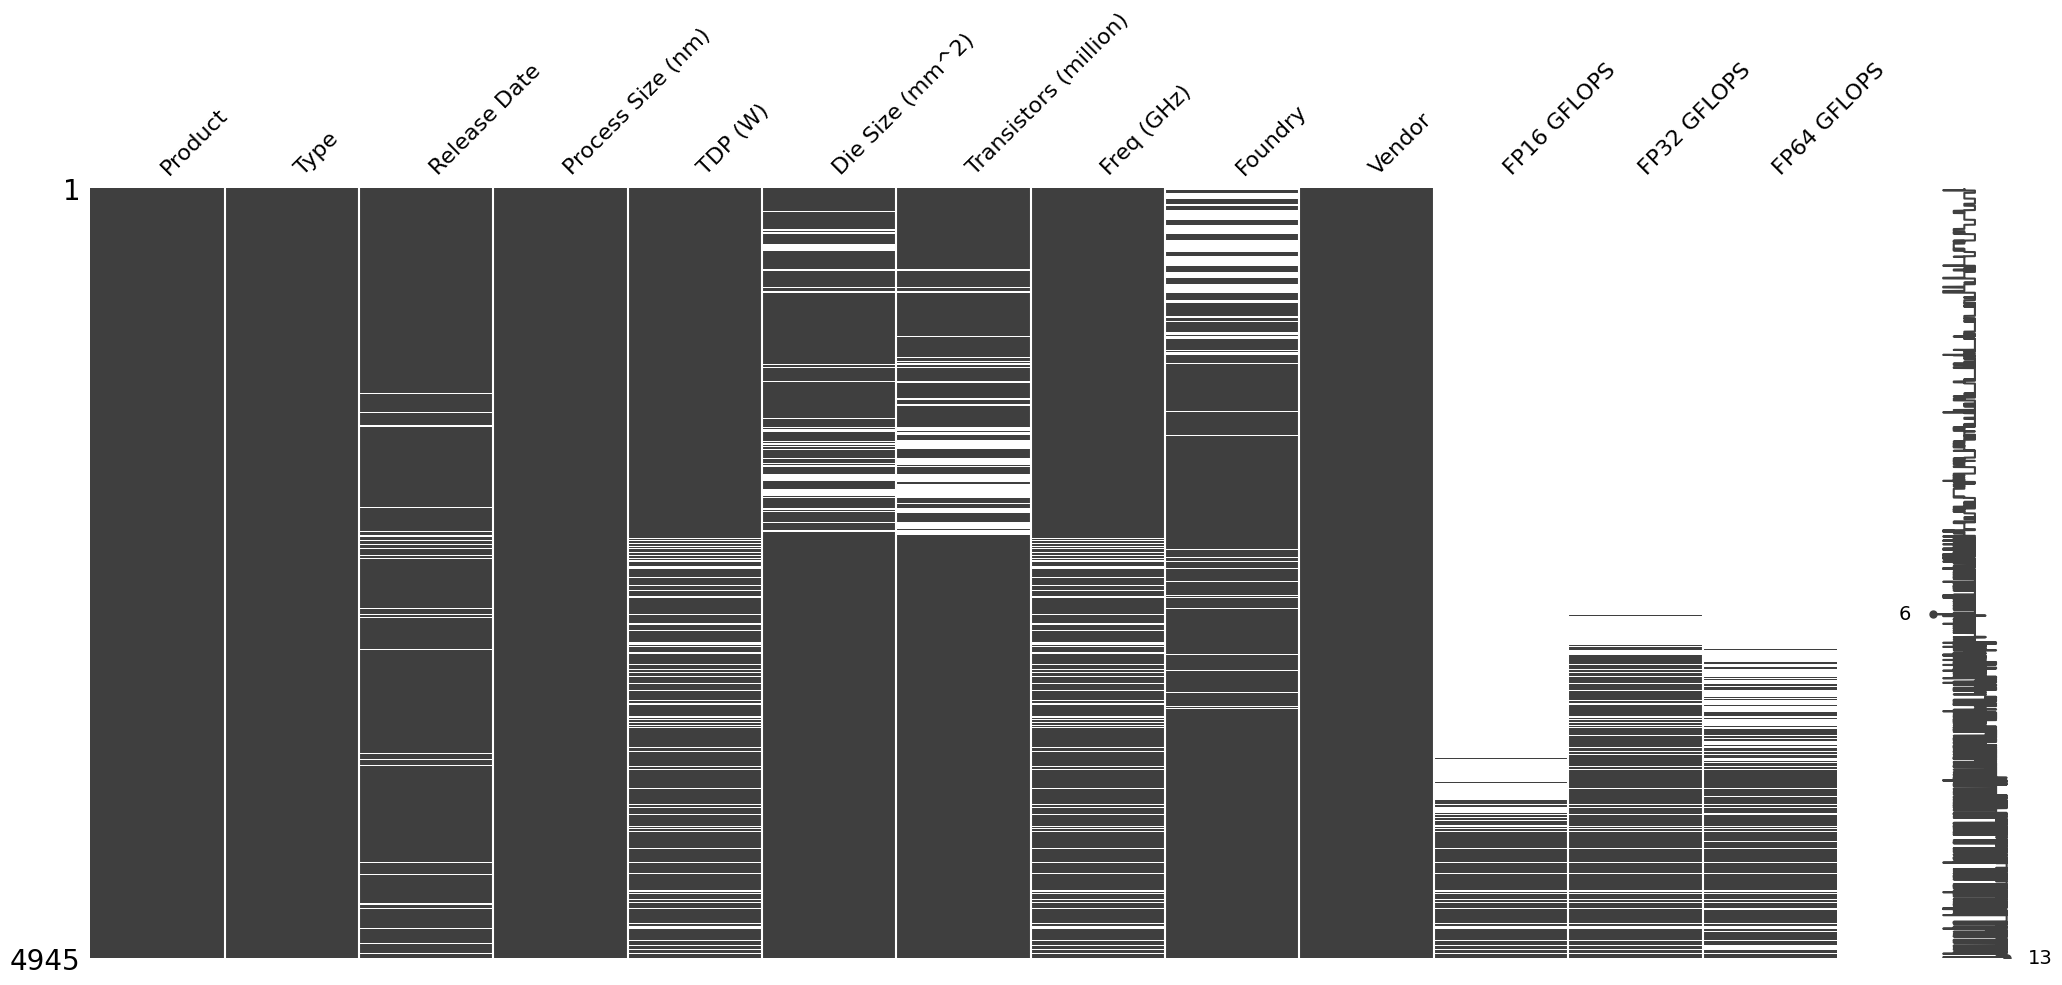

In [6]:
msno.matrix(chip_data)

<Axes: >

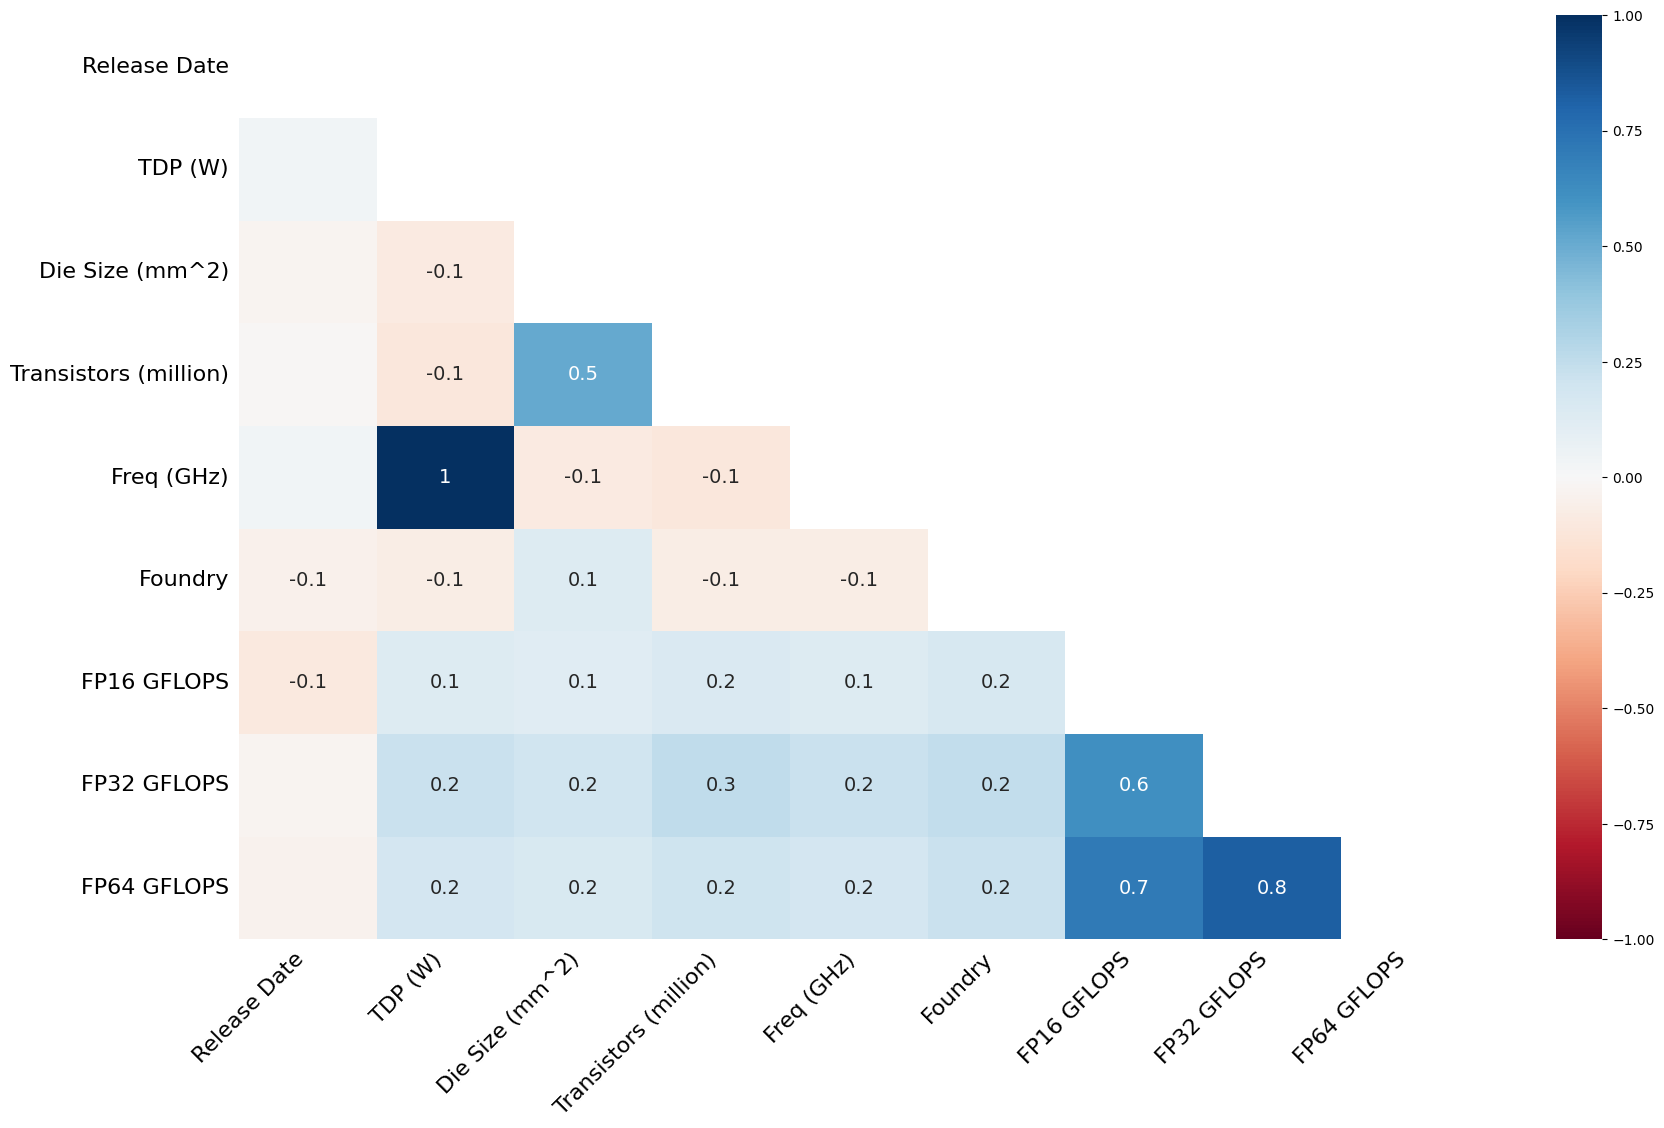

In [7]:
msno.heatmap(chip_data)

##**Transforming data to its correct format**

In [8]:
chip_data['Release Date'] = pd.to_datetime(chip_data['Release Date'])

<ipython-input-8-7cc39958b871>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chip_data['Release Date'] = pd.to_datetime(chip_data['Release Date'])


In [9]:
# Convert specific columns to numeric using apply and a lambda function
for col in ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)']:
    chip_data[col] = pd.to_numeric(chip_data[col], errors='coerce')


In [10]:
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4746 non-null   datetime64[ns]
 3   Process Size (nm)      4887 non-null   float64       
 4   TDP (W)                4054 non-null   float64       
 5   Die Size (mm^2)        4229 non-null   float64       
 6   Transistors (million)  4139 non-null   float64       
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP16 GFLOPS            800 non-null    float64       
 11  FP32 GFLOPS            1685 non-null   float64       
 12  FP64 GFLOPS            1278 non-null   float64       
dtypes: 

##**Dealing with the missing values**

In [11]:
dropping = ['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS' ]

chip_data.drop(dropping, axis=1, inplace=True)

In [12]:
columns_to_check = ['Die Size (mm^2)', 'Transistors (million)']
chip_data = chip_data.dropna(how='all', subset=columns_to_check)

In [13]:
columns_to_check = ['TDP (W)','Freq (GHz)']
chip_data = chip_data.dropna(how='all', subset=columns_to_check)

In [14]:
columns_to_check = ['Release Date']
chip_data = chip_data.dropna(how='all', subset=columns_to_check)

In [15]:
columns_to_check = ['Process Size (nm)']
chip_data = chip_data.dropna(how='all', subset=columns_to_check)

<Axes: >

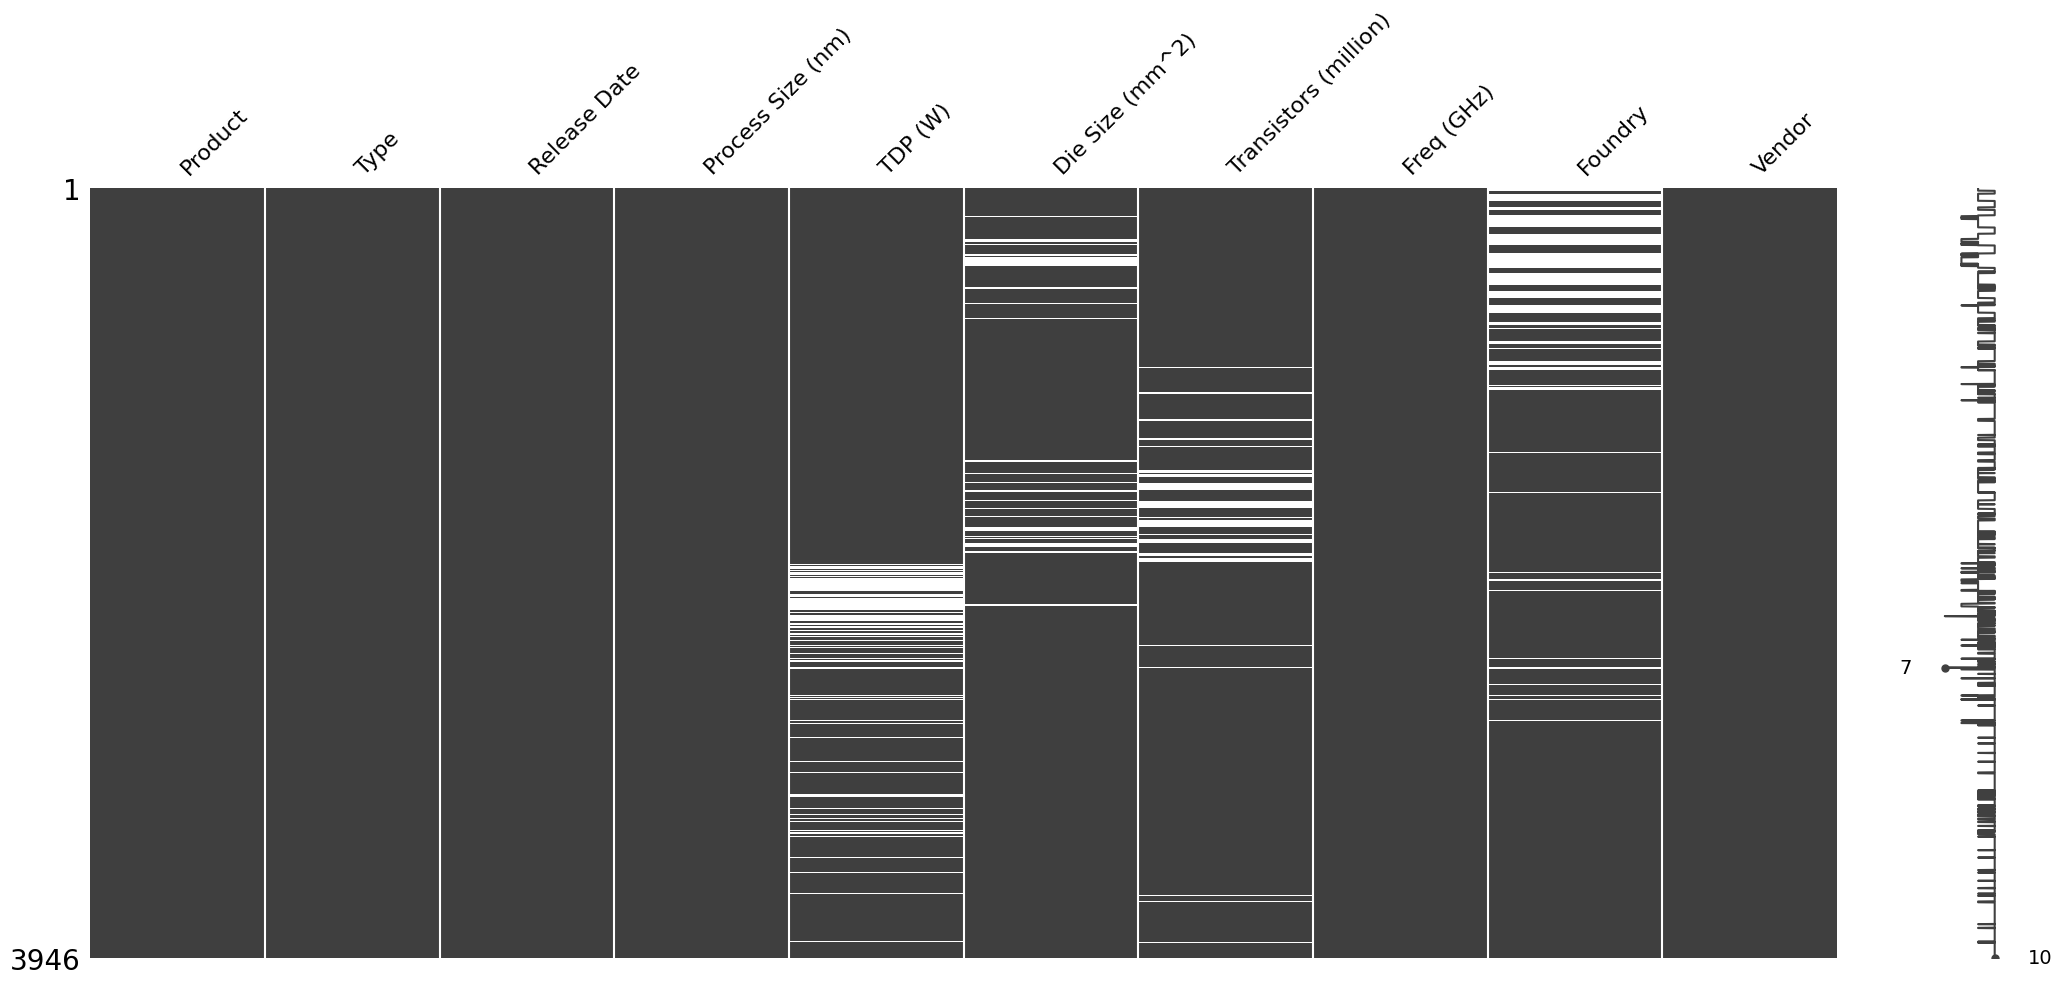

In [16]:
msno.matrix(chip_data)

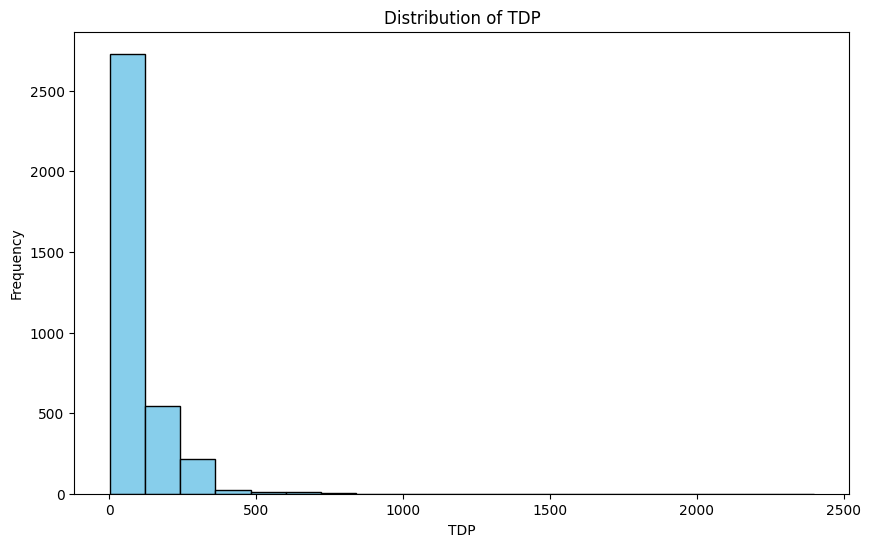

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(chip_data['TDP (W)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TDP')
plt.xlabel('TDP')
plt.ylabel('Frequency')
plt.show()

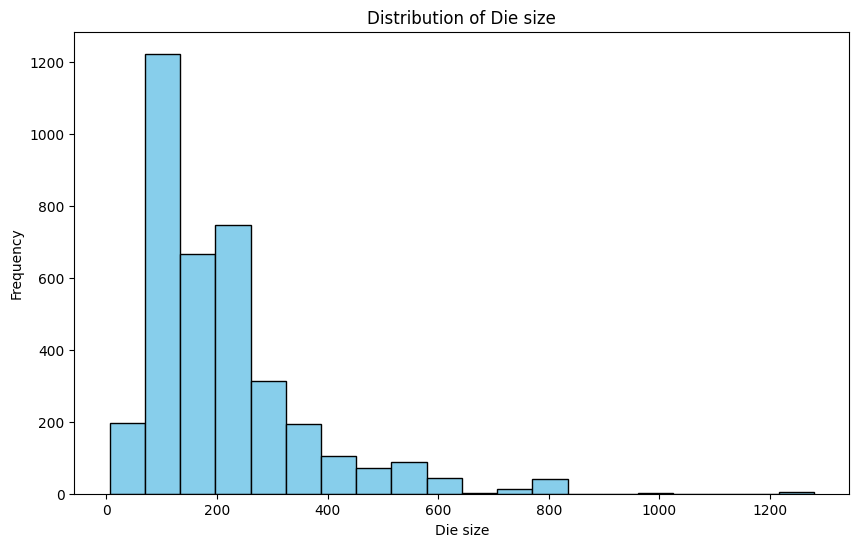

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(chip_data['Die Size (mm^2)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Die size')
plt.xlabel('Die size')
plt.ylabel('Frequency')
plt.show()

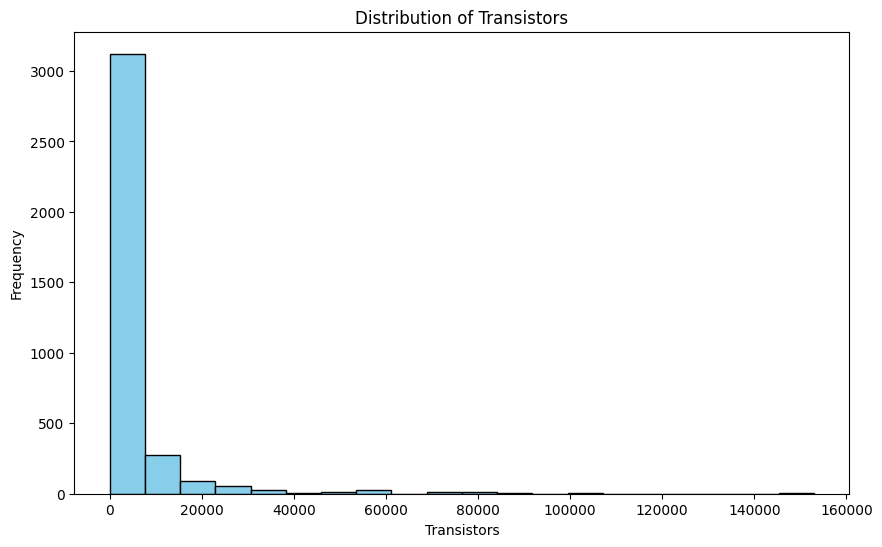

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(chip_data['Transistors (million)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transistors')
plt.xlabel('Transistors')
plt.ylabel('Frequency')
plt.show()

In [20]:
chip_data['Die Size (mm^2)'] = chip_data['Die Size (mm^2)'].fillna(chip_data['Die Size (mm^2)'].median())
chip_data['TDP (W)'] = chip_data['TDP (W)'].fillna(chip_data['TDP (W)'].median())
chip_data['Transistors (million)'] = chip_data['Transistors (million)'].fillna(chip_data['Transistors (million)'].median())
chip_data['Foundry'] = chip_data['Foundry'].fillna(chip_data['Foundry'].mode()[0])

1. Dropped columns: 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS' because over 50% of the data in these columns was missing.
2. Dropped rows where there were missing values in both columns: 'TDP (W)' and 'Freq (GHz)' because the missing values in both columns have a perfect correlation of 1.
3. Dropped rows where there were missing values in both columns: 'Die Size (mm^2)' and 'Transistors (million)' because the missing values in both columns have a strong correlation of 0.5.
4. Filling in the uncorrelated missing values in 'Die Size (mm^2)' and 'Transistors (million)' with median
5. Filling 'TDP (W)' with median and 'Foundry' with mode.

<Axes: >

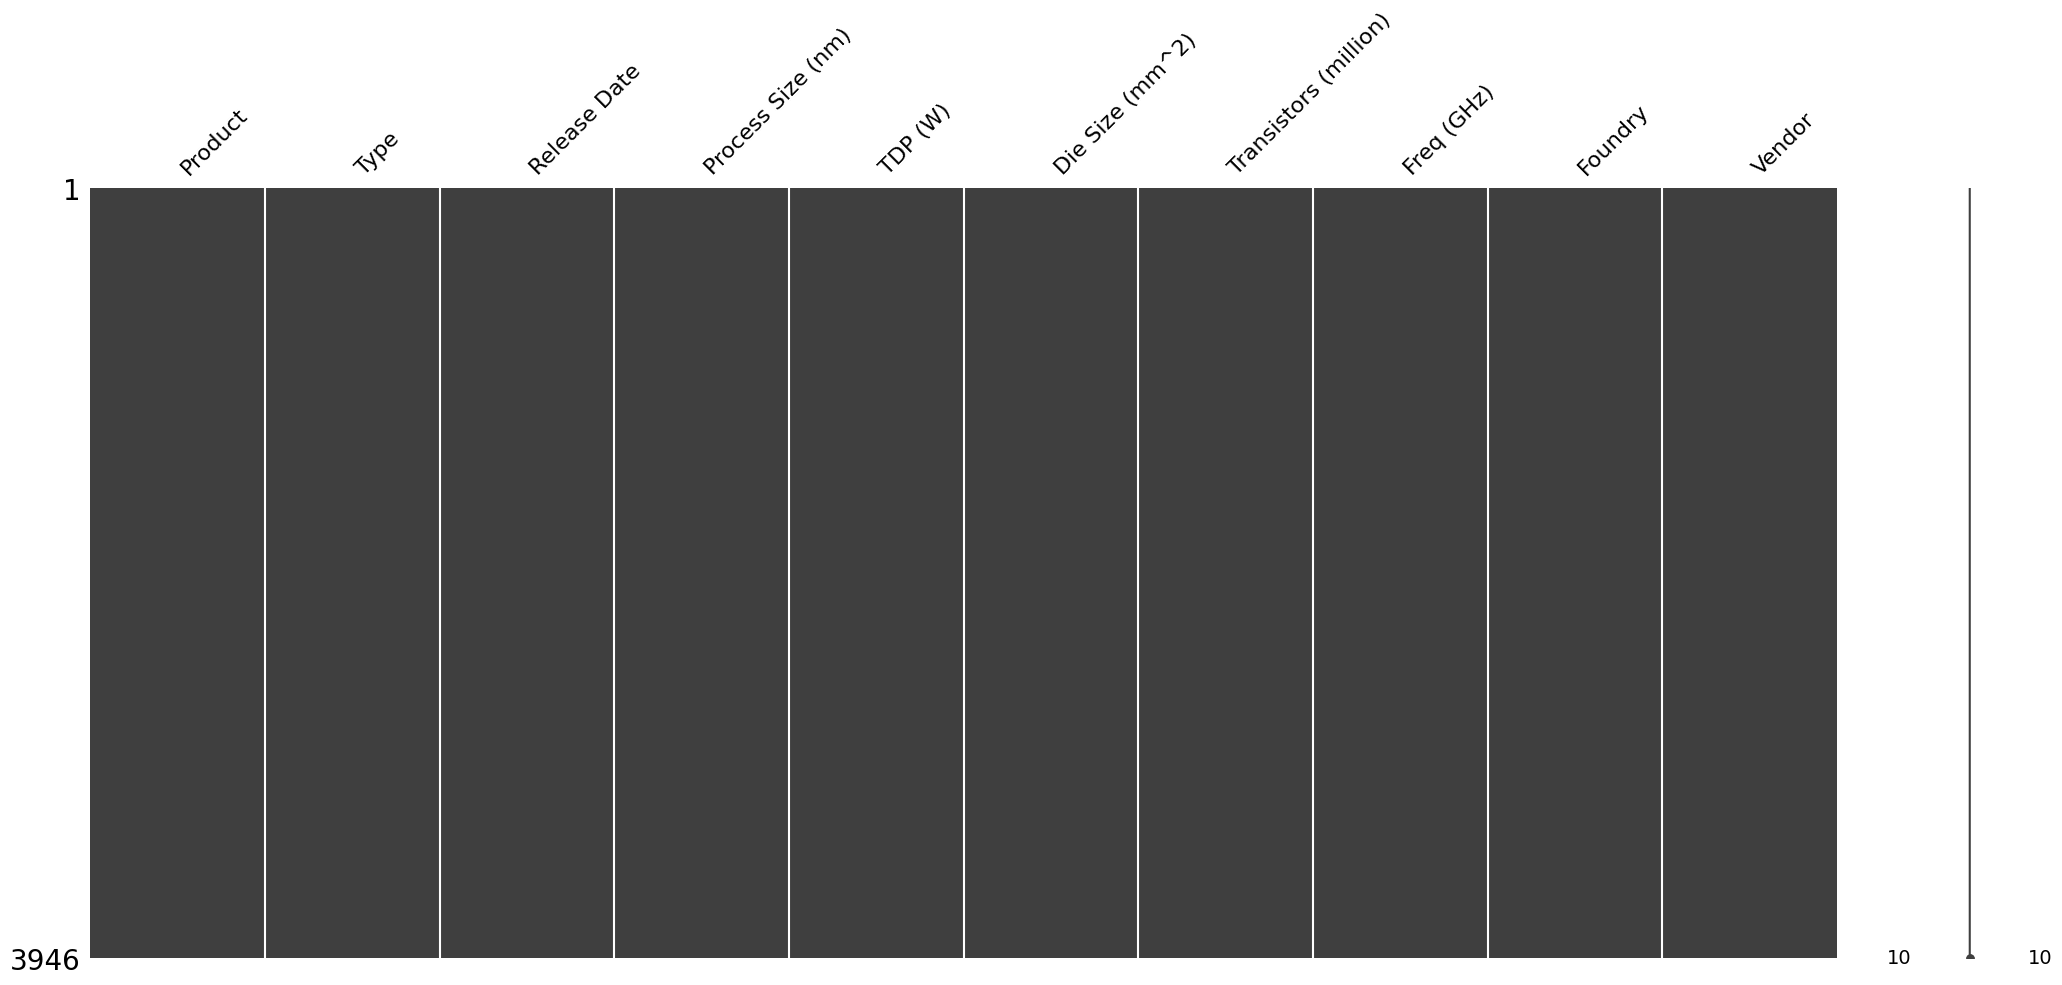

In [21]:
msno.matrix(chip_data)

#**EDA**

**1. Moore's Law still holds, especially in GPUs.**

In [22]:
chip_data['Log_Transistors'] = np.log10(chip_data['Transistors (million)'])

# Plot Transistor Count vs. Release Date (logarithmic scale)
fig = px.scatter(chip_data, x='Release Date', y='Log_Transistors', color='Type',
                 title="Moore's Law: Transistors over Time",
                 labels={'Log_Transistors': 'Log10(Transistor Count)'}, hover_data='Product')
fig.update_layout(xaxis_title="Release Date", yaxis_title="Log10(Transistor Count)")
fig.show()

**2. Dannard scaling is still valid in general.**

In [23]:
fig = px.scatter(chip_data, x='Die Size (mm^2)', y='TDP (W)', color='Type',
                 title="Dannard Scaling", hover_data='Product')
fig.update_layout(xaxis_title="Die Size", yaxis_title="TDP")
fig.show()

**3. CPUs have higher frequencies, but GPUs are catching up.**

In [24]:
fig = px.scatter(chip_data, y='Freq (GHz)', x='Release Date', color='Type',
                 title="CPU and GPU frequencies", hover_data='Product')
fig.update_layout(xaxis_title="Release Date", yaxis_title="Frequency")
fig.show()

**4. GPU performance doubles every 1.5 years.**

In [25]:
# Define GPU performance as Transistor count * Frequency
chip_data['Performance'] = chip_data['Transistors (million)'] * chip_data['Freq (GHz)']
gpu_df = chip_data[chip_data['Type'] == 'GPU']

fig = px.scatter(gpu_df, x='Release Date', y='Performance', color='Vendor', size='Die Size (mm^2)',
              title="GPU Performance over Time",
              labels={'Performance': 'Performance'})
fig.update_layout(xaxis_title="Release Date", yaxis_title="Performance")
fig.show()

**5. GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.**

In [26]:
fig = px.scatter(gpu_df, x='Transistors (million)', y='Performance', color='Freq (GHz)', size='Die Size (mm^2)',
              title="GPU Performance Improvement",hover_data=['Product'],
              labels={'Performance': 'Performance'})
fig.update_layout(xaxis_title="Transistors", yaxis_title="Performance")
fig.show()

**6. High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.**

In [27]:
chip_data['Log_Transistors'] = np.log10(chip_data['Transistors (million)'])

# Plot Transistor Count vs. Release Date (logarithmic scale)
fig = px.scatter(chip_data, x='Release Date', y='Log_Transistors', color='Process Size (nm)',
                 title="Transistors over Time",
                 labels={'Log_Transistors': 'Log10(Transistor Count)'}, hover_data=['Product', 'Type'])
fig.update_layout(xaxis_title="Release Date", yaxis_title="Log10(Transistor Count)")
fig.show()

**7. Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vendors**

In [28]:
fig = px.box(chip_data, x='Vendor', y='Process Size (nm)',
             title="Process Size Distribution by Vendor",
             labels={'Process Size (nm)': 'Process Size (nm)'})
fig.update_layout(xaxis_title="Vendor", yaxis_title="Process Size (nm)")
fig.show()

**8. TSMC makes the highest number of chips in the world**

In [29]:
foundry_counts = chip_data['Foundry'].value_counts()

fig = px.bar(foundry_counts, x=foundry_counts.index, y=foundry_counts.values,
             title="Chip Production by Foundry",
             labels={'x': 'Foundry', 'y': 'Count'})
fig.update_layout(xaxis_title="Foundry", yaxis_title="Chip Count")
fig.show()

**8. Correlation among features.**

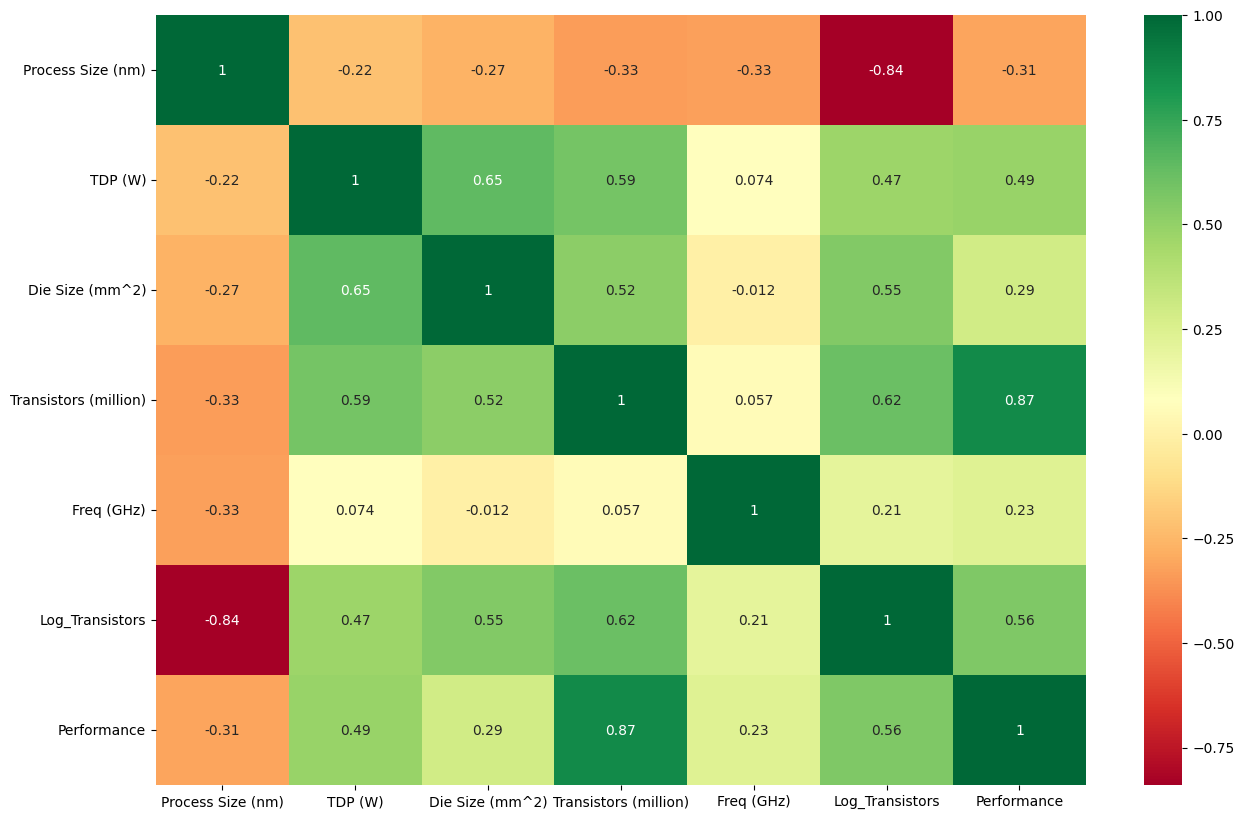

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(chip_data.corr(numeric_only=True),annot=True,cmap='RdYlGn')
plt.show()

**9. Encoding**

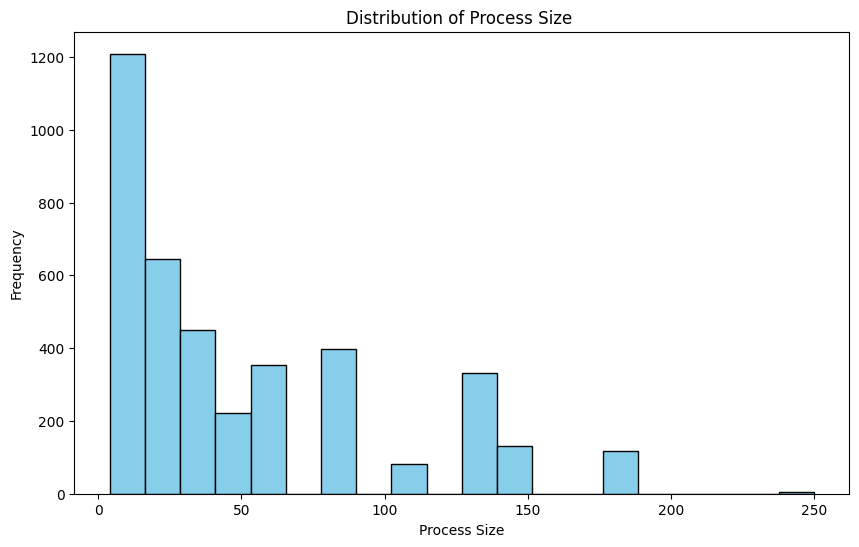

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(chip_data['Process Size (nm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Process Size ')
plt.xlabel('Process Size')
plt.ylabel('Frequency')
plt.show()

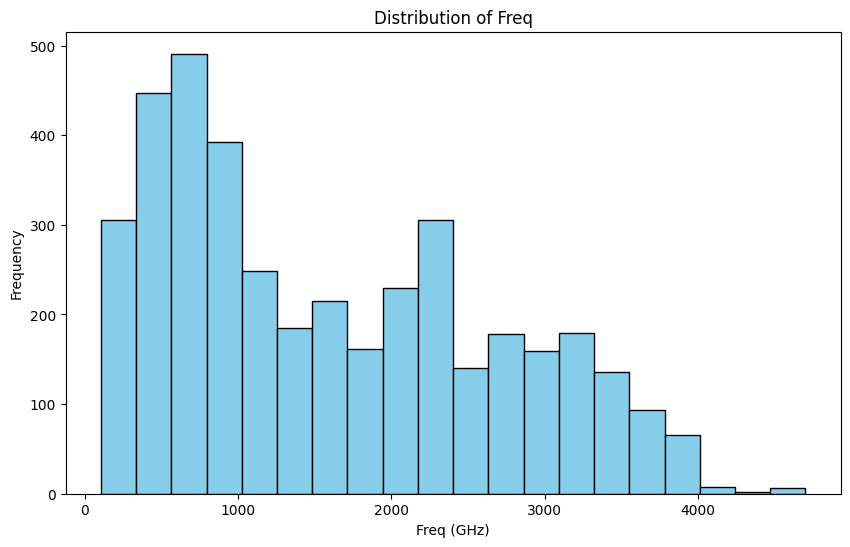

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(chip_data['Freq (GHz)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Freq')
plt.xlabel('Freq (GHz)')
plt.ylabel('Frequency')
plt.show()

In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns
categorical_features = chip_data.select_dtypes(include=['object']).columns

# Initialize encoders
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid multicollinearity
label_encoder = LabelEncoder()

# Apply One-Hot Encoding for Nominal Categorical Features (e.g., Type, Vendor)
nominal_features = ['Type', 'Vendor']  # Specify the nominal columns
chip_encoded = pd.get_dummies(chip_data, columns=nominal_features, drop_first=True)

# Apply Label Encoding for Ordinal Categorical Features (if any)
# Example: Assume 'Release Date' is ordinal
chip_encoded['Release Date'] = label_encoder.fit_transform(chip_data['Release Date'])


##**Bonus task**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [35]:
# Step 1: Train-Test Split
# Drop columns that are not useful for prediction or are the target variable
X = chip_data.drop(columns=['Type', 'Product', 'Release Date', 'Foundry', 'Vendor'])  # Features (independent variables)
y = chip_data['Type']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
# Select numerical features for scaling
# Make sure these columns exist in your DataFrame after encoding:
numerical_features = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)']

# Check if columns exist before scaling
for feature in numerical_features:
    if feature not in X_train.columns:
        print(f"Warning: {feature} not found in X_train. Check your data preprocessing steps.")

scaler_minmax = MinMaxScaler()

# Fit and transform the training data using only existing columns
existing_num_features = [f for f in numerical_features if f in X_train.columns]
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train[existing_num_features])
X_test_scaled_minmax = scaler_minmax.transform(X_test[existing_num_features])


In [36]:
# Step 3: Train Models
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled_minmax, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Step 4: Evaluate Models
# Logistic Regression Performance
y_pred_log_reg = log_reg.predict(X_test_scaled_minmax)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled_minmax)[:, 1]
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_log_reg):.2f}")

# Random Forest Performance
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

         CPU       0.97      0.94      0.96       399
         GPU       0.94      0.97      0.96       391

    accuracy                           0.96       790
   macro avg       0.96      0.96      0.96       790
weighted avg       0.96      0.96      0.96       790

Accuracy: 0.96
ROC-AUC: 0.99

Random Forest Performance:
              precision    recall  f1-score   support

         CPU       0.99      0.99      0.99       399
         GPU       0.99      0.99      0.99       391

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790

Accuracy: 0.99
ROC-AUC: 1.00


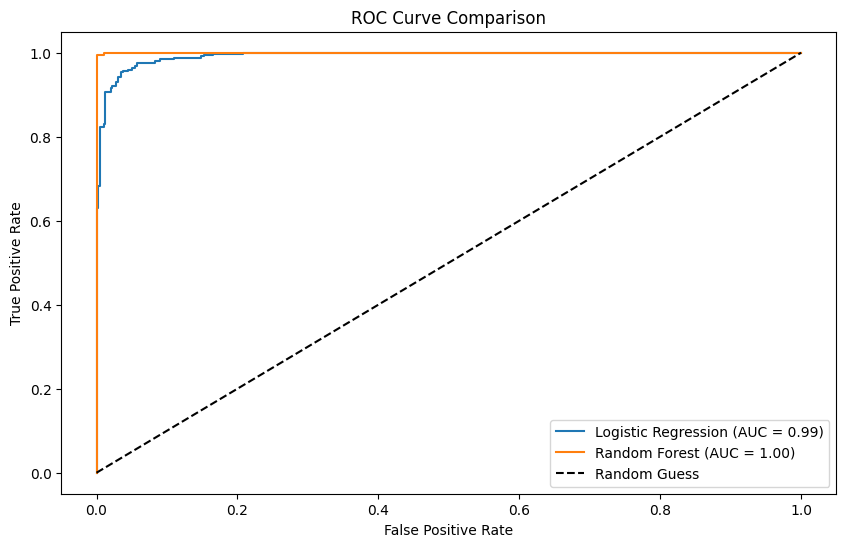

In [38]:
# Step 5: Compare ROC Curves
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_test_binary = encoder.fit_transform(y_test)  # 'GPU' will be encoded as 1, 'CPU' as 0

# Now use y_test_binary in roc_curve:
fpr_log, tpr_log, _ = roc_curve(y_test_binary, y_prob_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_prob_rf)


plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_log_reg)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()